In [6]:
import pointpats
from pointpats import PointPattern
import geopandas as gpd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
stations_postcovid = gpd.read_file('../data/curated/stations_postcovid.gpkg')

In [9]:
def get_ann(df):
    coordinates = list()
    for index, row in df.iterrows():
        coordinates.append((row.geometry.x, row.geometry.y))

    coordinate_array = np.array(coordinates)
    point_pattern = PointPattern(coordinate_array)
    return  point_pattern.mean_nnd.round(3),  point_pattern.nnd# mean nearest neighbour distance

In [11]:
np.median(get_ann(stations_postcovid)[1])

1119.1533771903487

In [12]:
def get_F_function(df):
    coordinates = list()
    for index, row in df.iterrows():
        coordinates.append((row.geometry.x, row.geometry.y))

    coordinate_array = np.array(coordinates)
    f_point_pattern = pointpats.f_test(coordinate_array, support = 1000, keep_simulations = True, n_simulations = 9999) 
    # plotting F function
    plt.plot(f_point_pattern.support, f_point_pattern.statistic, 
            color='orangered', label='Observed - Spatial Pattern')

    # plotting the mean of simulations
    plt.plot(f_point_pattern.support, np.mean(f_point_pattern.simulations, axis=0), 
            color='b', label = 'Expected - Random Spatial Pattern')

    plt.legend()

    # labelling axis
    plt.xlabel('Distance (m)')
    plt.ylabel('F Function')

    # title
    plt.title('F Function', fontsize = 12)

    plt.show()

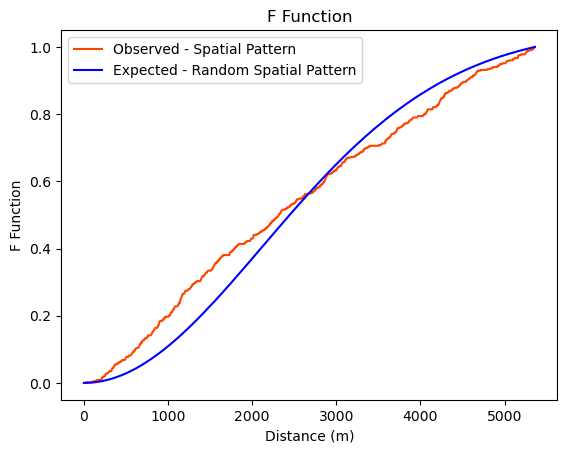

In [13]:
get_F_function(stations_postcovid)

In [7]:
def get_G_function(df):
    coordinates = list()
    for index, row in df.iterrows():
        coordinates.append((row.geometry.x, row.geometry.y))

    coordinate_array = np.array(coordinates)
    nearest_neighbor_distances = []
    for point in coordinate_array:
        distances = np.linalg.norm(coordinate_array - point, axis=1)
        distances = distances[distances > 0]  # exclude zero distance to itself
        nearest_neighbor_distances.append(np.min(distances))
    
    # Convert to numpy array
    nearest_neighbor_distances = np.array(nearest_neighbor_distances)
    
    # Plot PDF using histogram and KDE
    plt.figure(figsize=(10, 6))
    sns.histplot(nearest_neighbor_distances, kde=True, stat="density", bins=30)
    
    # Labeling axis
    plt.xlabel('Nearest Neighbor Distance (m)')
    plt.ylabel('Density')
    
    # Title
    plt.title('PDF of Nearest Neighbor Distances', fontsize=12)
    
    plt.show()

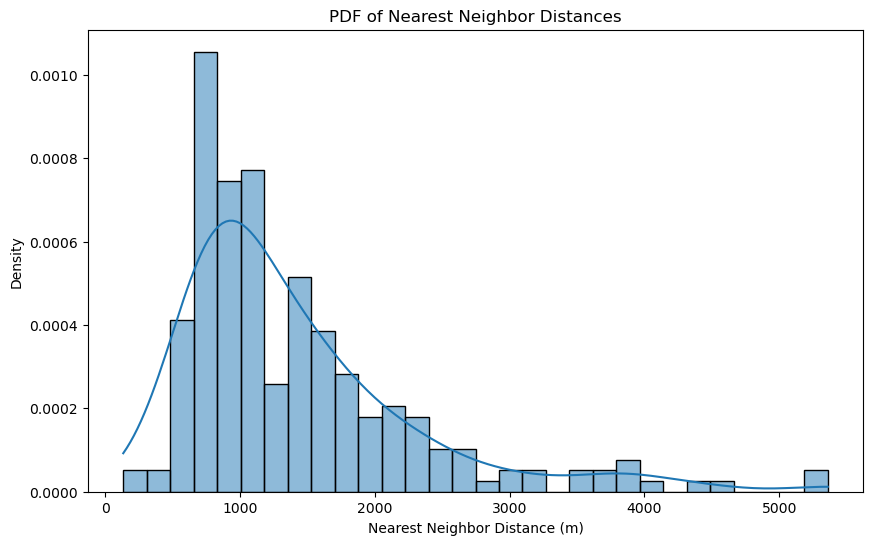

In [8]:
get_G_function(stations_postcovid)